# Load data and functions

For this additional tutorial, we use the scRNA-seq data from the erythroid differentiation analysis with primary human hematopoietic stem/progenitor cells (HSPCs). We let the D13 (inflammated) cells as the target dataset and the other groups of cells as the candidate background dataset. We recommend to replace the directory name '/storage10/kwangmoon/BasCoD/' with the name of the directory, where the BasCoD was installed.

This tutorial will reproduce Fig.5 of the Manuscript.

In [1]:
library(dplyr)
source('/storage10/kwangmoon/BasCoD/Rcodes/functions/BasCoD.R')
setwd('/storage10/kwangmoon/BasCoD/data')
target=readRDS('/storage10/kwangmoon/BasCoD/data/Liao_D13_trt.rds')
background=readRDS('/storage10/kwangmoon/BasCoD/data/Liao_others.rds')
meta=readRDS('/storage10/kwangmoon/BasCoD/data/Liao_meta.rds')
data_name=names(background)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




# Visual representation of DR and CDR results

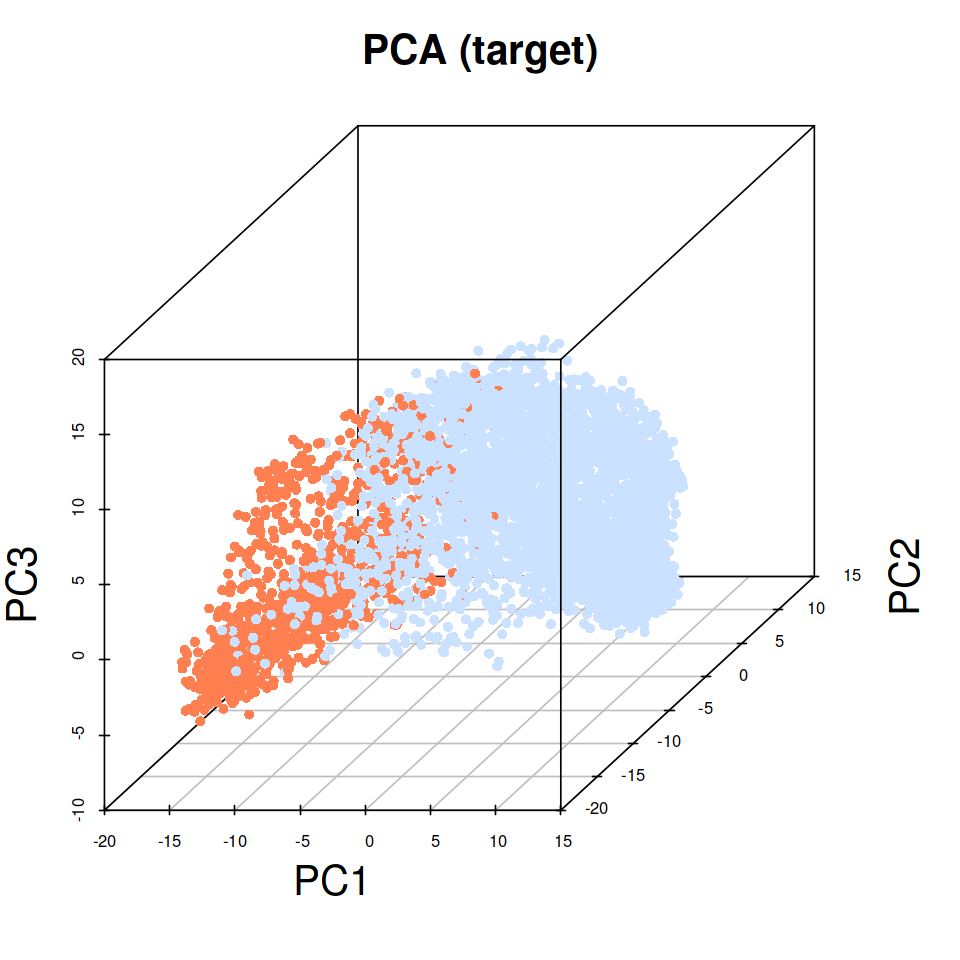

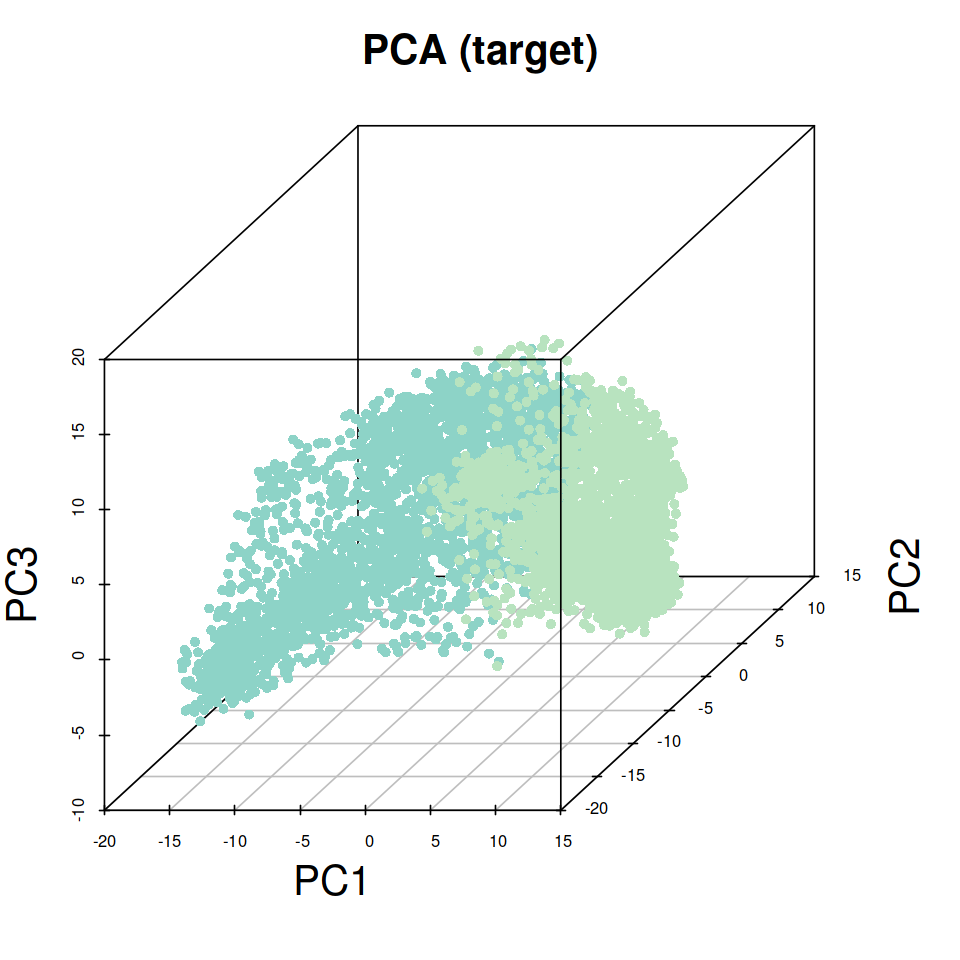

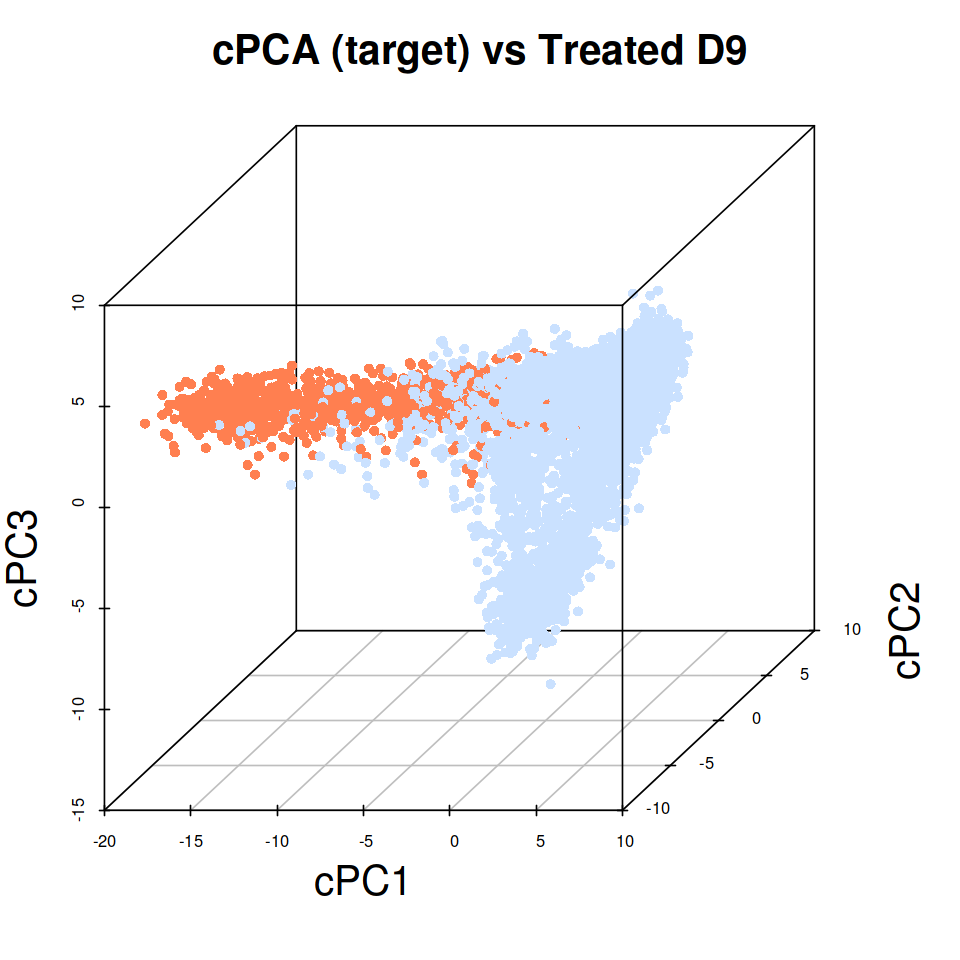

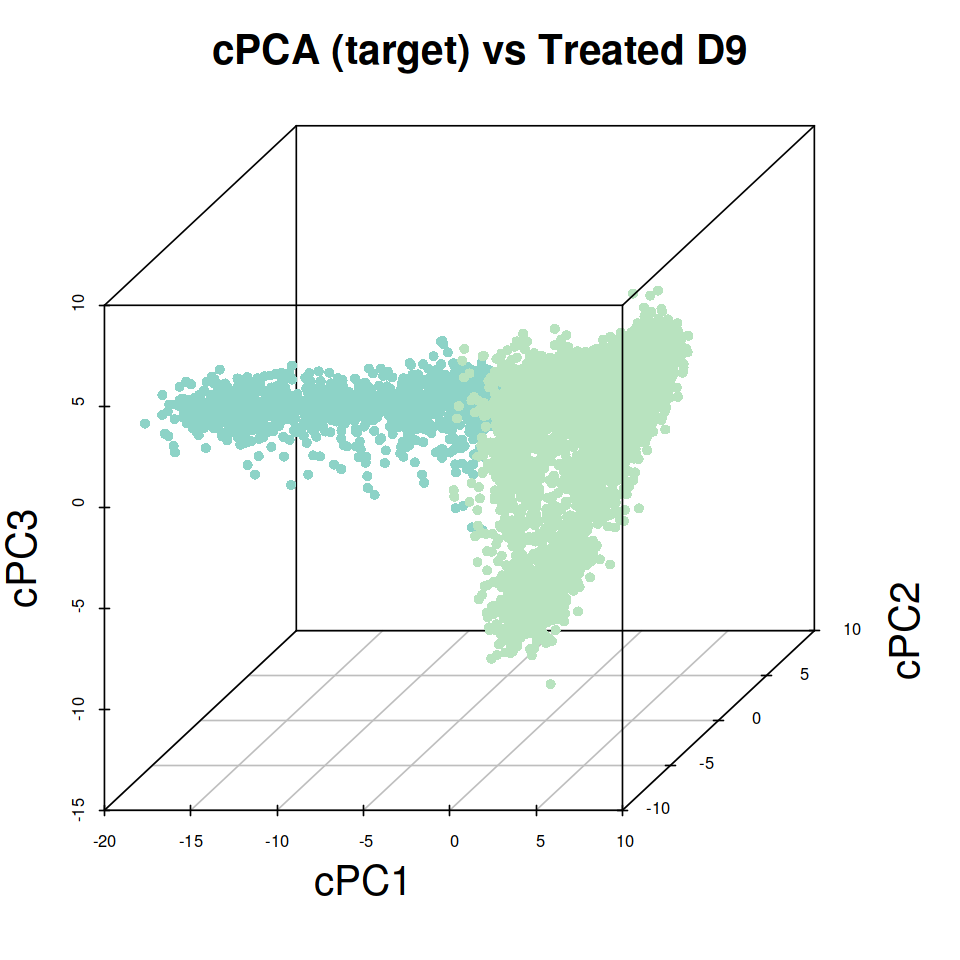

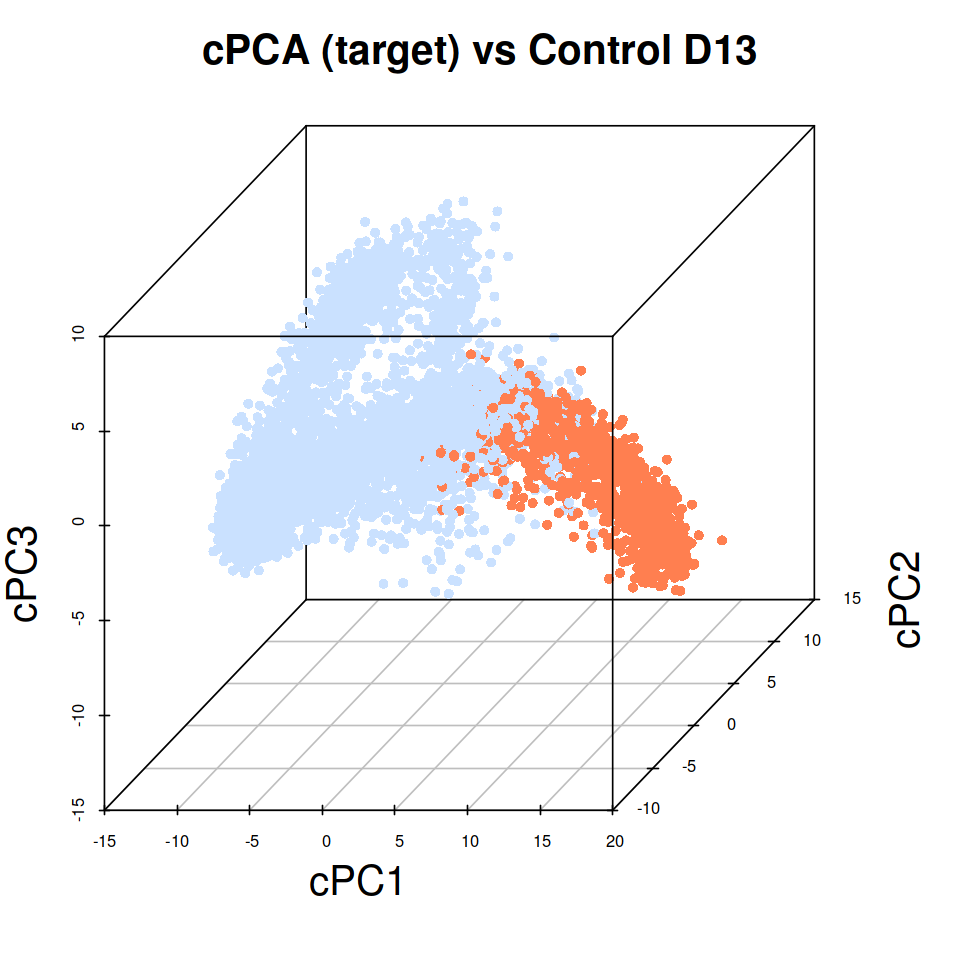

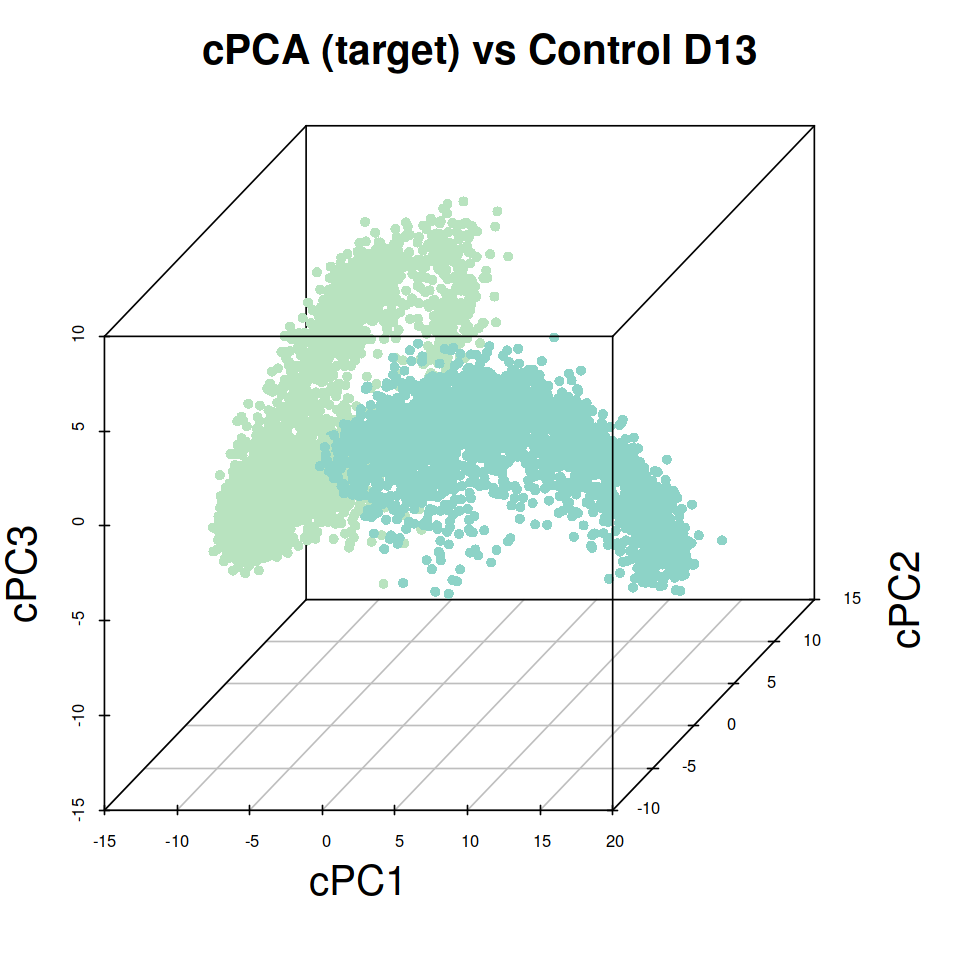

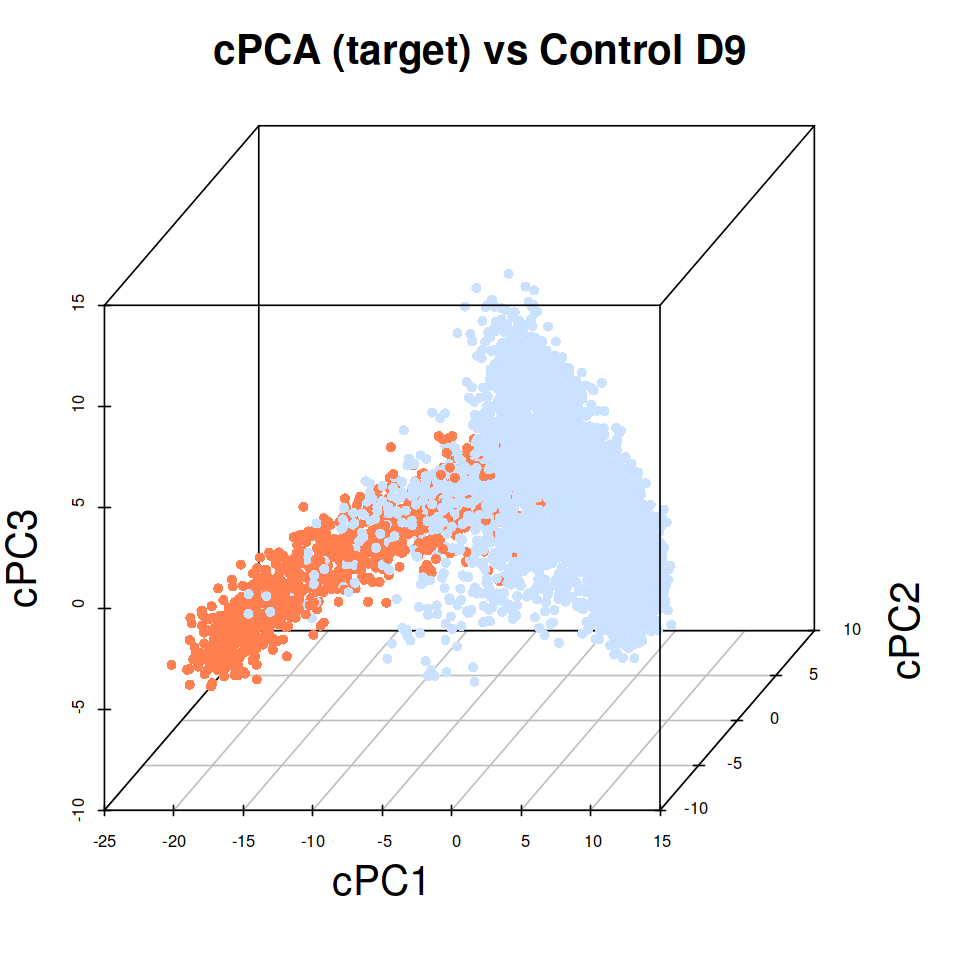

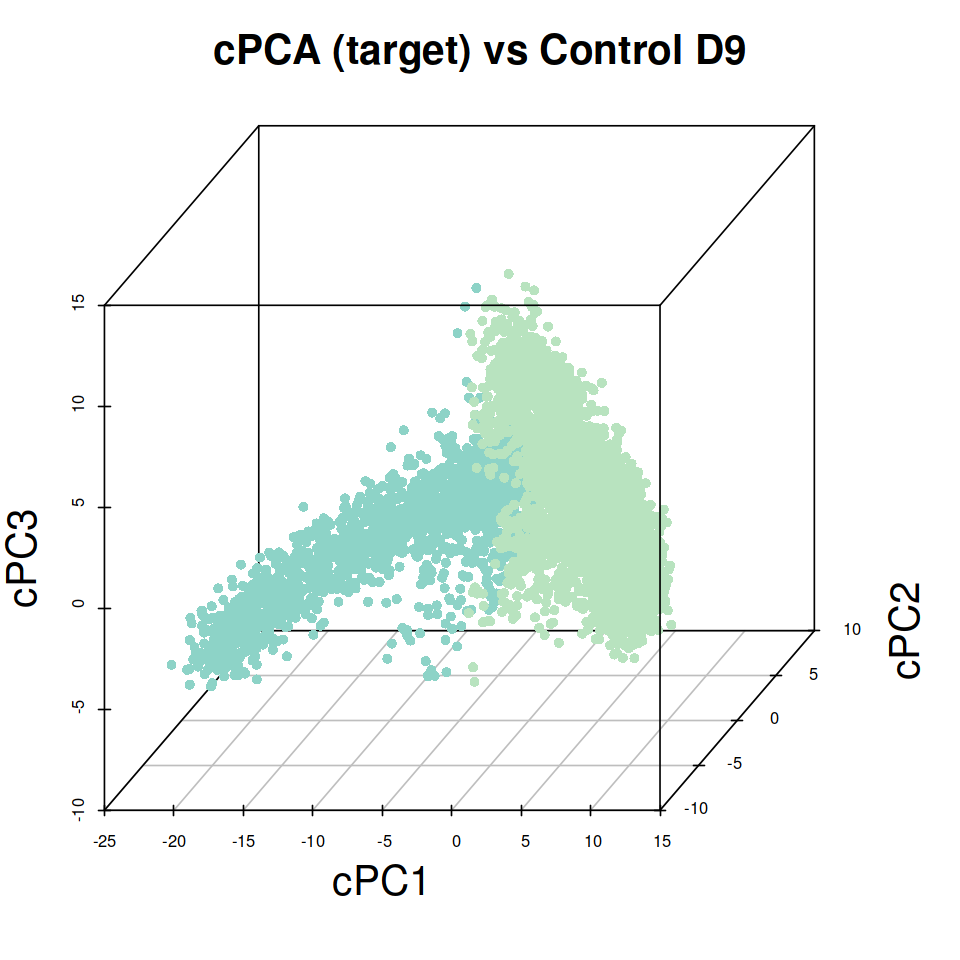

In [2]:
library(RColorBrewer)
library(scatterplot3d)


X_0=target
cov_0=cov(X_0)
for (b in 1:3) {

X_j=background[[b]]
    
  cov_a <- cov(X_j)

  # For b == 1: alpha = 0 and 4
  # For b == 2,3: alpha = 4 only
  alphas <- if (b == 1) c(0, 4) else 4

  for (alpha in alphas) {

    ## ----- eigen & cPC -----
    cprc_res <- eigen(cov_0 - alpha * cov_a)
    cPC <- X_0 %*% cprc_res$vectors

    ## ----- colors from meta$escaped -----
    colors <- meta$escaped
    colors[colors == "Escaped"] <- "coral"
    colors[colors != "coral"]   <- "lightsteelblue1"

    ## ----- labels & titles exactly matching your original code -----
    if (b == 1 && alpha == 0) {
      xlab_txt <- "PC1"
      ylab_txt <- "PC2"
      zlab_txt <- "PC3"
      main_txt <- "PCA (target)"
    } else if (b == 1 && alpha == 4) {
      xlab_txt <- "cPC1"
      ylab_txt <- "cPC2"
      zlab_txt <- "cPC3"
      main_txt <- "cPCA (target) vs Treated D9"
    } else if (b == 2 && alpha == 4) {
      xlab_txt <- "cPC1"
      ylab_txt <- "cPC2"
      zlab_txt <- "cPC3"
      main_txt <- "cPCA (target) vs Control D13"
    } else if (b == 3 && alpha == 4) {
      xlab_txt <- "cPC1"
      ylab_txt <- "cPC2"
      zlab_txt <- "cPC3"
      main_txt <- "cPCA (target) vs Control D9"
    }

    ## ----- first scatter: colored by meta$escaped -----
    options(repr.plot.width = 8, repr.plot.height = 8)
    scatterplot3d(
      cPC[,1], cPC[,2], cPC[,3], colors,
      xlab = xlab_txt, ylab = ylab_txt, zlab = zlab_txt,
      pch = 16, cex.lab = 2, cex.main = 2, main = main_txt
    )

    ## ----- k-means clustering + new colors -----
    set.seed(1)
    groups <- kmeans(cPC[,1:3], centers = 2)$cluster
    colors <- ifelse(
      groups == 1,
      colorRampPalette(brewer.pal(12, "Set3"))(30)[1],
      colorRampPalette(brewer.pal(12, "Set3"))(30)[2]
    )

    ## ----- second scatter: colored by k-means cluster -----
    options(repr.plot.width = 8, repr.plot.height = 8)
    scatterplot3d(
      cPC[,1], cPC[,2], cPC[,3], colors,
      xlab = xlab_txt, ylab = ylab_txt, zlab = zlab_txt,
      pch = 16, cex.lab = 2, cex.main = 2, main = main_txt
    )
  }
}


It turns out that the cPCA with the background D9 (treated) provides the clusters that best match with the escaping behavior label, which also is supported by the BasCoD p-values reported below.

# BasCoD results

In [3]:
R_j_list=c(4,8,6)
for(b in 1:3){
print(paste0("Candidate bakcground: ",data_name[b]))
X_0=target
X_j=background[[b]]
prc_0=prcomp(X_0)
prc_j=prcomp(X_j)
embedding_0=prc_0$x
embedding_j=prc_j$x    
bascod_res=BasCoD_single(X_0=X_0,X_j=X_j,R_0=9,R_j=R_j_list[[b]],embedding_0=embedding_0,embedding_j = embedding_j,eps=0.3)
    
    
}

[1] "Candidate bakcground: Inflammation D9"
[1] "BasCoD p-value is : 1"
[1] "Candidate bakcground: No inflammmation D13"
[1] "BasCoD p-value is : 2.03567545000817e-146"
[1] "Candidate bakcground: No inflammation D9"
[1] "BasCoD p-value is : 0.000996351669728314"
